# COURSERA CAPSTONE

### Introduction/Business Plan

This project aims to take the data of the most common causes of traffic accidents and collisions based on factors such as <b>Weather, Location, Injuries, Speeding, Fatalities</b>, as well as the different types of accidents based on the <i>Seattle Collision Code</i> and whether the individuals in the accident were <b>Under the Influence</b>.   Using that data I will develop a model using <b>K-Nearest Neighbor and Logistic Regression </b> that can look at these variables and figure out how to minimize the risk of some of these factors happening again.

### Data

The dataset “Data Collsions.csv” is provided by the Seattle Police Department and Seattle Traffic Management. The data  covers traffic accidents in the city from 2004 to present day.  The dataset includes information on the location of the accident, as well as how many drivers, pedestrians and vehicles were involved, weather conditions and whether it was day or night. As well as other specific details about each individual incident.


## Loading the Data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
location = "Data_Collisions.csv"
df = pd.read_csv(location)

/Users/jgacuca/Desktop/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Examining the Data

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [7]:
df.shape

(194673, 38)

In [8]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [9]:
df.drop(['OBJECTID'], inplace = True, axis=1)

In [10]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


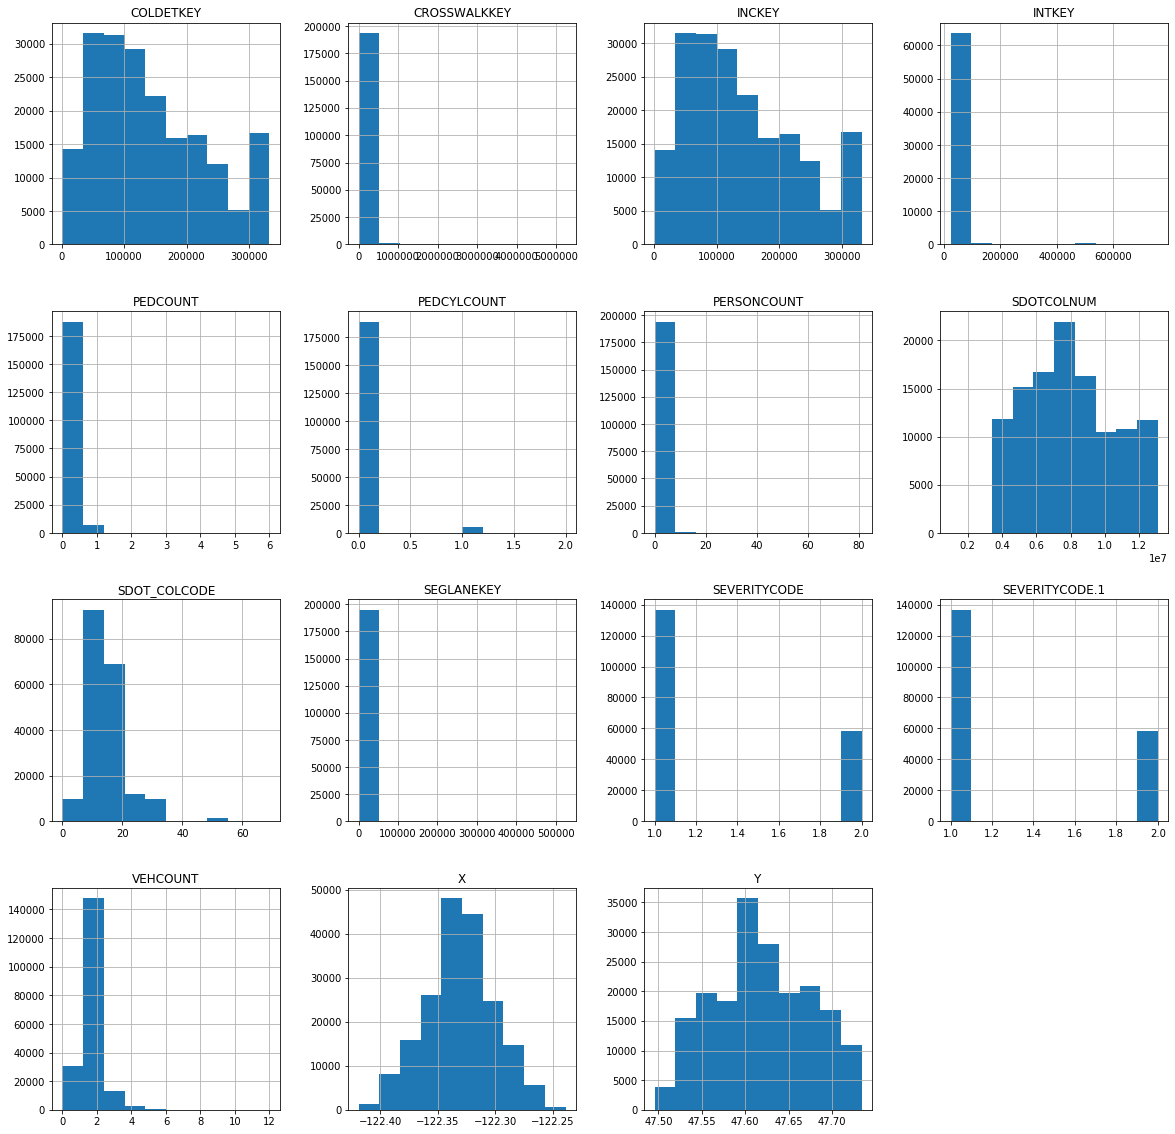

In [11]:
df.hist(figsize=(20,20))
plt.show()

## Converting Categorical Data into Dummy Variables & Cleaning Other Variables

Convert Speeding to Dummy Variables "0" = "Did not speed" & "1" = "Speeding"

In [12]:
df['SPEEDING'].isnull().sum()

185340

In [67]:
df['SPEEDING'].replace(np.nan,0, inplace=True)
df['SPEEDING'].replace('N',0, inplace=True)
df['SPEEDING'].replace('Y',1, inplace=True)

In [68]:
df['SPEEDING'].isnull().sum()

0

In [69]:
df['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

Convert "Under the Influence" to Dummy Variables "0" = "Was not Under the Influence" & "1" = "Under the Influence"

In [70]:
df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [71]:
df['UNDERINFL'].replace("N",0, inplace=True)
df['UNDERINFL'].replace(np.nan,0, inplace=True)
df['UNDERINFL'].replace("Y",1, inplace=True)

In [72]:
df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

Convert "Hit Parked Car" to Dummy Variables "0" = "Did not hit parked car" & "1" = "hit parked car"

In [73]:
df['HITPARKEDCAR'].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

In [74]:
df['HITPARKEDCAR'].replace("N",0, inplace=True)
df['HITPARKEDCAR'].replace(np.nan,0, inplace=True)
df['HITPARKEDCAR'].replace("Y",1, inplace=True)

Convert "Pedestrian Right Of Way Not Granted" to Dummy Variables "0" = "Not Granted" & "1" = "Granted"

In [75]:
df['PEDROWNOTGRNT'].value_counts()

0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64

In [76]:
df['PEDROWNOTGRNT'].shape

(194673,)

In [77]:
df['PEDROWNOTGRNT'].replace("N",0, inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan,0, inplace=True)
df['PEDROWNOTGRNT'].replace("Y",1, inplace=True)

In [78]:
df['PEDROWNOTGRNT'].value_counts()

0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64

Convert "Severity Code" to Dummy Variables "0" = "Prop Damage" & "1" = "Serious Injury"

In [79]:
df['SEVERITYCODE.1'].value_counts()

0    136485
1     58188
Name: SEVERITYCODE.1, dtype: int64

In [80]:
df['SEVERITYCODE.1'].isnull().sum()

0

In [81]:
df['SEVERITYCODE.1'].replace(1,0, inplace=True)
df['SEVERITYCODE.1'].replace(2,1, inplace=True)

In [82]:
df['SEVERITYCODE.1'].value_counts()

0    194673
Name: SEVERITYCODE.1, dtype: int64

In [86]:
df['SDOT_COLCODE'].value_counts()

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [87]:
df['SDOT_COLCODE'].shape

(194673,)

In [88]:
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

# Logistic Regression

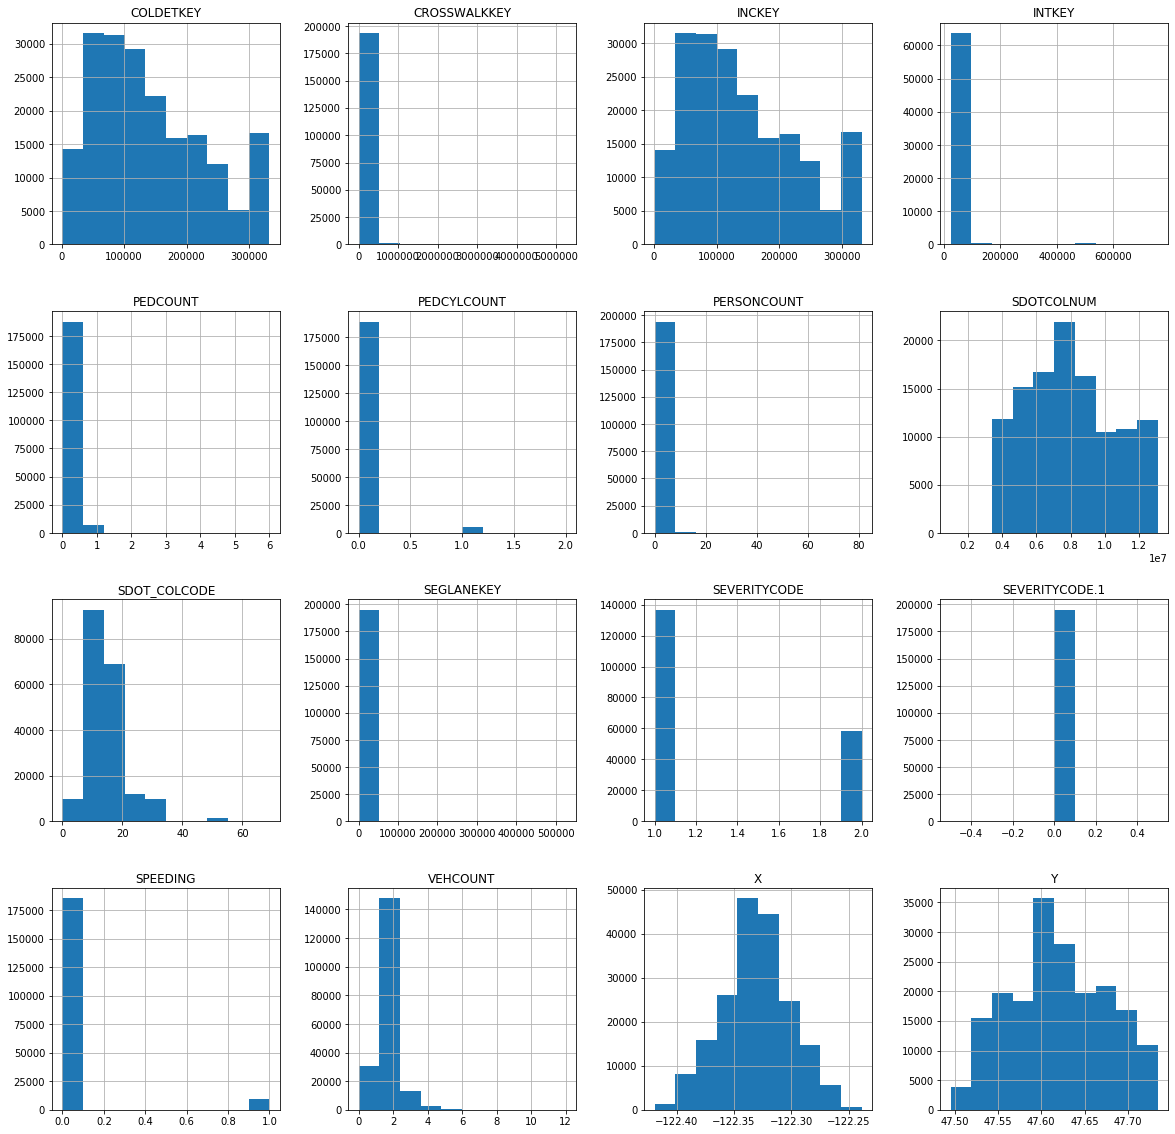

In [89]:
df.hist(figsize=(20,20))
plt.show()

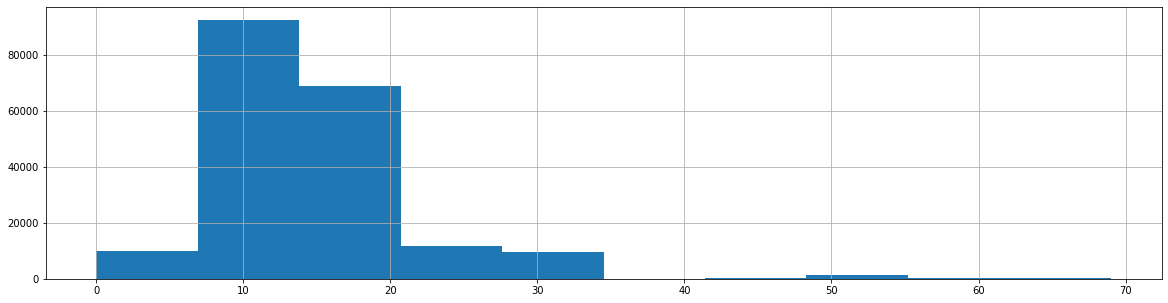

In [95]:
df['SDOT_COLCODE'].hist(figsize=(20,5))
plt.show()

In [22]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [23]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [24]:
df['SDOTCOLNUM'].isnull().sum()

79737

In [25]:
df['SDOTCOLNUM'].dropna(axis=0, inplace=False)

1          6354039.0
2          4323031.0
4          4028032.0
6          8344002.0
8          6166014.0
             ...    
117551    13065012.0
117554    13015014.0
117555    13019005.0
117557    13034014.0
117560    13060031.0
Name: SDOTCOLNUM, Length: 114936, dtype: float64

In [26]:
df['SDOTCOLNUM'].isnull().sum()

79737

In [49]:
adf = df[['PERSONCOUNT','VEHCOUNT','HITPARKEDCAR','PEDCOUNT','UNDERINFL','SPEEDING', 'PEDROWNOTGRNT']]
adf.head(10)

,PERSONCOUNT,VEHCOUNT,HITPARKEDCAR,PEDCOUNT,UNDERINFL,SPEEDING,PEDROWNOTGRNT
0,2,2,0,0,0,0,0
1,2,2,0,0,0,0,0
2,4,3,0,0,0,0,0
3,3,3,0,0,0,0,0
4,2,2,0,0,0,0,0
5,2,2,0,0,0,0,0
6,2,2,0,0,0,0,0
7,3,1,0,0,0,0,0
8,2,2,0,0,0,0,0
9,2,2,0,0,0,0,0


# MAP VISUALIZATION

In [28]:
df['X'].isnull().sum()

5334

In [29]:
df['Y'].isnull().sum()

5334

In [30]:
df['Y'].dropna()

0         47.703140
1         47.647172
2         47.607871
3         47.604803
4         47.545739
            ...    
194668    47.565408
194669    47.690924
194670    47.683047
194671    47.678734
194672    47.611017
Name: Y, Length: 189339, dtype: float64

In [31]:
df['X'].dropna()

0        -122.323148
1        -122.347294
2        -122.334540
3        -122.334803
4        -122.306426
             ...    
194668   -122.290826
194669   -122.344526
194670   -122.306689
194671   -122.355317
194672   -122.289360
Name: X, Length: 189339, dtype: float64

In [32]:
df['X'].isnull().sum()

5334

In [33]:
df['Y'].isnull().sum()

5334

In [34]:
# limit = 100
# df = df.iloc[0:limit, :]

In [35]:
df.head(50)

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,0,10,Entering at angle,0,0,0
1,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,0
2,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,0,32,One parked--one moving,0,0,0
3,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,0,23,From same direction - all others,0,0,0
4,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,0,10,Entering at angle,0,0,0
5,1,-122.387598,47.690575,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,...,Dry,Daylight,NaN,NaN,0,10,Entering at angle,0,0,0
6,1,-122.338485,47.618534,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,...,Wet,Daylight,NaN,8344002.0,0,10,Entering at angle,0,0,0
7,2,-122.320780,47.614076,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,...,Dry,Daylight,NaN,NaN,0,5,Vehicle Strikes Pedalcyclist,6855,0,0
8,1,-122.335930,47.611904,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,...,Dry,Daylight,NaN,6166014.0,0,32,One parked--one moving,0,0,0
9,2,-122.384700,47.528475,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,...,Dry,Daylight,NaN,6079001.0,0,10,Entering at angle,0,0,0


In [36]:
latitude = 47.60
longitude = -122.34

In [37]:
seattle_map = folium.Map(location=[latitude, longitude])

In [38]:
seattle_map

In [39]:
accidents = folium.map.FeatureGroup()

In [40]:
# for lat, lng, in zip(df.Y, df.X):
#     accidents.add_child(
#         folium.features.CircleMarker(
#             [lat, lng],
#             radius=10,
#             color='white',
#             fill=True,
#             fill_color='blue',
#             fill_opacity=0.6
#         )
#     )

# # add accidents to map
# seattle_map.add_child(accidents)